<a href="https://colab.research.google.com/github/AmitSP-beep/Protein-Clustering-/blob/main/Human_Protein_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

# ===== CONFIGURATION =====
input_csv = "/content/human_proteins_with_pI.csv"  # Path to your UniProt CSV
output_csv = "human_proteins_clustering_ready.csv"
top_n_go_terms = 400          # Keep only top N GO terms
# =========================

# Load your CSV
df = pd.read_csv(input_csv)

# Keep only useful columns
useful_cols = ['Entry', 'Length', 'Mass', 'pI', 'Gene Ontology (molecular function)']
df_useful = df[useful_cols].copy()

# Drop rows with missing values in key columns
df_useful.dropna(subset=['Length', 'Mass', 'pI', 'Gene Ontology (molecular function)'], inplace=True)

# Split GO terms into lists
df_useful['Gene Ontology (molecular function)'] = df_useful['Gene Ontology (molecular function)'].str.split('; ')

# Explode GO terms into separate rows
df_exploded = df_useful.explode('Gene Ontology (molecular function)')

# Count frequency of GO terms
go_counts = df_exploded['Gene Ontology (molecular function)'].value_counts()

# Select top N GO terms
top_go_terms = set(go_counts.head(top_n_go_terms).index)

# Keep only top N GO terms
df_exploded = df_exploded[df_exploded['Gene Ontology (molecular function)'].isin(top_go_terms)]

# One-hot encode GO terms
df_onehot = pd.get_dummies(df_exploded['Gene Ontology (molecular function)'])
df_onehot['Entry'] = df_exploded['Entry'].values

# Aggregate back to one row per protein
df_final_go = df_onehot.groupby('Entry').max().reset_index()

# Merge numeric features
df_numeric = df_useful[['Entry', 'Length', 'Mass', 'pI']].drop_duplicates()
df_final = pd.merge(df_numeric, df_final_go, on='Entry', how='inner')

# Save clustering-ready CSV
df_final.to_csv(output_csv, index=False)

print(f"✅ Clustering-ready CSV saved to: {output_csv}")
print(f"Number of rows: {len(df_final)}, Number of columns: {df_final.shape[1]}")


✅ Clustering-ready CSV saved to: human_proteins_clustering_ready.csv
Number of rows: 14878, Number of columns: 404


**Now we have the dataset**

In [20]:
df=pd.read_csv('/content/human_proteins_clustering_ready.csv')

In [21]:
df.head(5)

,Entry,Length,Mass,pI,14-3-3 protein binding [GO:0071889],"2 iron, 2 sulfur cluster binding [GO:0051537]","3',5'-cyclic-AMP phosphodiesterase activity [GO:0004115]","3',5'-cyclic-GMP phosphodiesterase activity [GO:0047555]",3'-5'-RNA exonuclease activity [GO:0000175],"4 iron, 4 sulfur cluster binding [GO:0051539]",...,ubiquitin-like ligase-substrate adaptor activity [GO:1990756],ubiquitin-like protein ligase binding [GO:0044389],ubiquitin-protein transferase activity [GO:0004842],unfolded protein binding [GO:0051082],virus receptor activity [GO:0001618],voltage-gated calcium channel activity [GO:0005245],voltage-gated potassium channel activity [GO:0005249],xenobiotic transmembrane transporter activity [GO:0042910],zinc ion binding [GO:0008270],zinc ion transmembrane transporter activity [GO:0005385]
0,A0A087X1C5,515,57489,8.2544,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A0A0C5B5G6,16,2175,10.5923,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,A0A0K2S4Q6,201,21806,5.1744,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A0A1B0GTW7,788,85397,7.4870,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,A0AV96,593,64099,7.4503,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Select only boolean columns (True/False)
bool_cols = df.select_dtypes(include=['bool']).columns

# Convert them to 1/0
df[bool_cols] = df[bool_cols].astype(int)


In [23]:
df.head(6)

,Entry,Length,Mass,pI,14-3-3 protein binding [GO:0071889],"2 iron, 2 sulfur cluster binding [GO:0051537]","3',5'-cyclic-AMP phosphodiesterase activity [GO:0004115]","3',5'-cyclic-GMP phosphodiesterase activity [GO:0047555]",3'-5'-RNA exonuclease activity [GO:0000175],"4 iron, 4 sulfur cluster binding [GO:0051539]",...,ubiquitin-like ligase-substrate adaptor activity [GO:1990756],ubiquitin-like protein ligase binding [GO:0044389],ubiquitin-protein transferase activity [GO:0004842],unfolded protein binding [GO:0051082],virus receptor activity [GO:0001618],voltage-gated calcium channel activity [GO:0005245],voltage-gated potassium channel activity [GO:0005249],xenobiotic transmembrane transporter activity [GO:0042910],zinc ion binding [GO:0008270],zinc ion transmembrane transporter activity [GO:0005385]
0,A0A087X1C5,515,57489,8.2544,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A0A0C5B5G6,16,2175,10.5923,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A0K2S4Q6,201,21806,5.1744,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A1B0GTW7,788,85397,7.4870,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A0AV96,593,64099,7.4503,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A0AVI4,362,40464,7.3666,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df.describe()

,Length,Mass,pI,14-3-3 protein binding [GO:0071889],"2 iron, 2 sulfur cluster binding [GO:0051537]","3',5'-cyclic-AMP phosphodiesterase activity [GO:0004115]","3',5'-cyclic-GMP phosphodiesterase activity [GO:0047555]",3'-5'-RNA exonuclease activity [GO:0000175],"4 iron, 4 sulfur cluster binding [GO:0051539]",ABC-type transporter activity [GO:0140359],...,ubiquitin-like ligase-substrate adaptor activity [GO:1990756],ubiquitin-like protein ligase binding [GO:0044389],ubiquitin-protein transferase activity [GO:0004842],unfolded protein binding [GO:0051082],virus receptor activity [GO:0001618],voltage-gated calcium channel activity [GO:0005245],voltage-gated potassium channel activity [GO:0005249],xenobiotic transmembrane transporter activity [GO:0042910],zinc ion binding [GO:0008270],zinc ion transmembrane transporter activity [GO:0005385]
count,14878.000000,1.487800e+04,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,...,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000,14878.000000
mean,600.808308,6.694736e+04,7.181516,0.002151,0.001815,0.001411,0.001479,0.002151,0.003025,0.001882,...,0.008536,0.001680,0.013241,0.008267,0.005444,0.002756,0.003293,0.001680,0.144845,0.001748
std,621.698559,6.908901e+04,1.782838,0.046329,0.042563,0.037544,0.038427,0.046329,0.054915,0.043342,...,0.091999,0.040959,0.114309,0.090551,0.073587,0.052425,0.057296,0.040959,0.351956,0.041769
min,11.000000,1.142000e+03,3.192300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,296.000000,3.307900e+04,5.711675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,452.000000,5.040300e+04,7.004500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,717.000000,8.024650e+04,8.543875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34350.000000,3.816030e+06,13.438600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.duplicated().sum()

np.int64(40)

In [25]:
df=df.drop('Entry',axis=1)

Number of components for 95% variance: 290


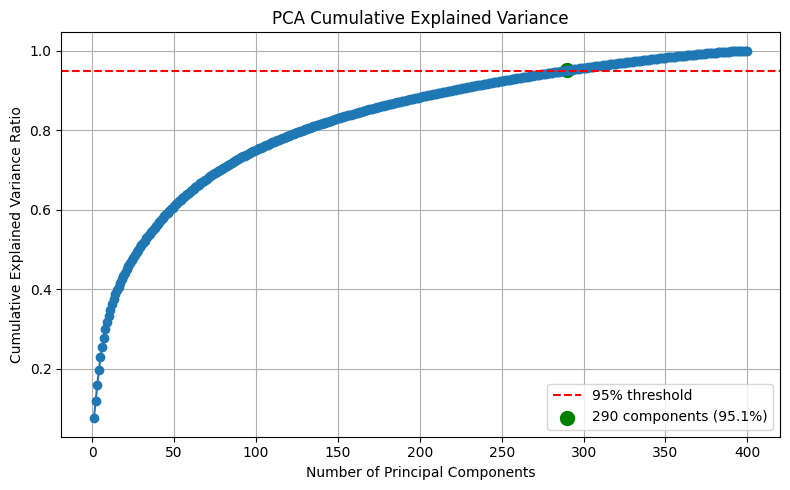

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume df is your DataFrame
# Step 1: Separate out the three columns
cols_to_keep = ['Length', 'Mass', 'pI']
df_meta = df[cols_to_keep]
df_features = df.drop(columns=cols_to_keep)

# Step 2: Fit PCA on the remaining features
pca_initial = PCA(n_components=min(df_features.shape[0], df_features.shape[1]), random_state=42)
pca_initial.fit(df_features)

# Step 3: Compute cumulative explained variance
cum_var = np.cumsum(pca_initial.explained_variance_ratio_)

# Step 4: Determine number of components for 95% threshold
threshold = 0.95
n_components = np.searchsorted(cum_var, threshold) + 1
print(f"Number of components for {threshold*100:.0f}% variance: {n_components}")

# Step 5: Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cum_var) + 1), cum_var, marker='o')
plt.axhline(threshold, color='red', linestyle='--', label=f'{threshold*100:.0f}% threshold')
plt.scatter(n_components, cum_var[n_components-1], color='green', s=100,
            label=f'{n_components} components ({cum_var[n_components-1]*100:.1f}%)')
plt.title('PCA Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Re-fit PCA with the chosen number of components
pca_final = PCA(n_components=n_components, random_state=42)
pc_array = pca_final.fit_transform(df_features)

# Step 7: Convert principal components to DataFrame
pc_columns = [f'PC{i+1}' for i in range(n_components)]
df_pcs = pd.DataFrame(pc_array, columns=pc_columns, index=df.index)

# Step 8: Concatenate the metadata columns back with the principal components
df_result = pd.concat([df_meta, df_pcs], axis=1)

# df_result now contains 'Length', 'Mass', 'pI', followed by PC1…PCn_components


k=2 → silhouette=0.768, CH=12852.8, DB=0.556
k=3 → silhouette=0.758, CH=13474.2, DB=0.376
k=4 → silhouette=0.649, CH=21207.3, DB=0.416
k=5 → silhouette=0.614, CH=28814.7, DB=0.411
k=6 → silhouette=0.564, CH=36258.2, DB=0.434
k=7 → silhouette=0.556, CH=41529.0, DB=0.450
k=8 → silhouette=0.545, CH=46196.4, DB=0.460
k=9 → silhouette=0.545, CH=54891.0, DB=0.437
k=10 → silhouette=0.540, CH=63509.5, DB=0.442


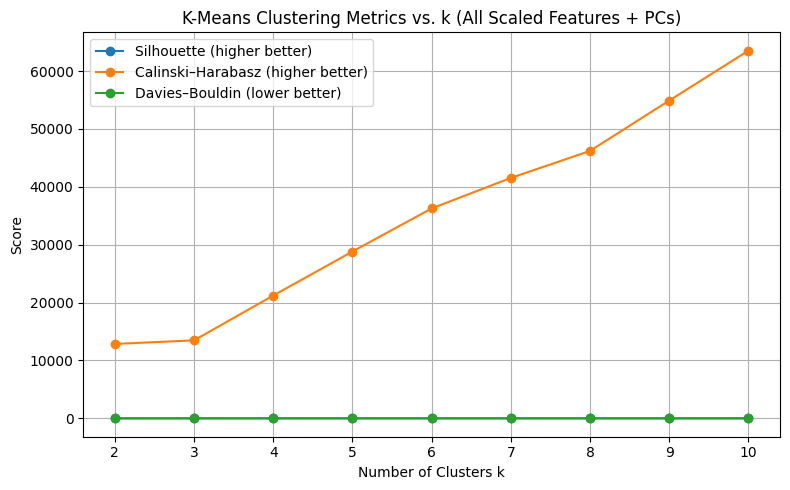

Optimal k by silhouette score: 2


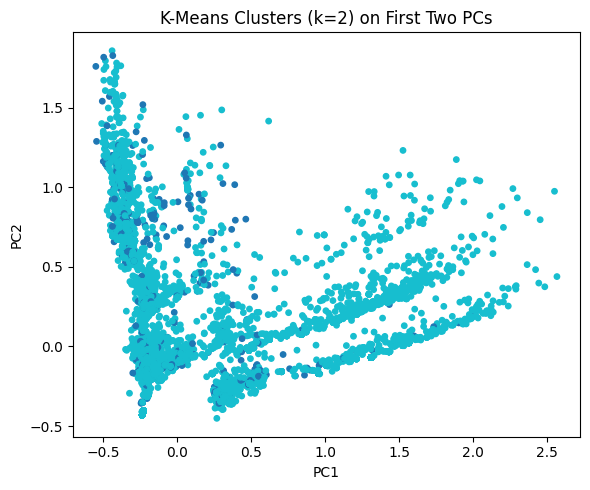

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume df_result contains:
# - Scaled 'Length', 'Mass', 'pI' columns
# - PCA component columns (e.g., 'PC1', 'PC2', ..., 'PCn')

# 1. Use all features for clustering: scaled meta variables + PCA components
X_all_features = df_result.values  # Use all columns for clustering

# 2. Evaluate K-Means for several k
k_values = range(2, 11)
sil_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_all_features)

    sil_scores.append(silhouette_score(X_all_features, labels))
    ch_scores.append(calinski_harabasz_score(X_all_features, labels))
    db_scores.append(davies_bouldin_score(X_all_features, labels))

    print(f"k={k} → silhouette={sil_scores[-1]:.3f}, CH={ch_scores[-1]:.1f}, DB={db_scores[-1]:.3f}")

# 3. Plot metrics vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', label='Silhouette (higher better)')
plt.plot(k_values, ch_scores, marker='o', label='Calinski–Harabasz (higher better)')
plt.plot(k_values, db_scores, marker='o', label='Davies–Bouldin (lower better)')
plt.xlabel('Number of Clusters k')
plt.ylabel('Score')
plt.title('K-Means Clustering Metrics vs. k (All Scaled Features + PCs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Choose best k and fit final K-Means
best_k = k_values[np.argmax(sil_scores)]
print(f"Optimal k by silhouette score: {best_k}")

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(X_all_features)

# 5. Attach cluster labels back to your df_result
df_result = df_result.copy()
df_result['cluster'] = final_labels

# 6. (Optional) Visualize clusters on first two PCs or your preferred features
plt.figure(figsize=(6, 5))
plt.scatter(df_result['PC1'], df_result['PC2'], c=final_labels, cmap='tab10', s=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clusters (k={best_k}) on First Two PCs')
plt.tight_layout()
plt.show()


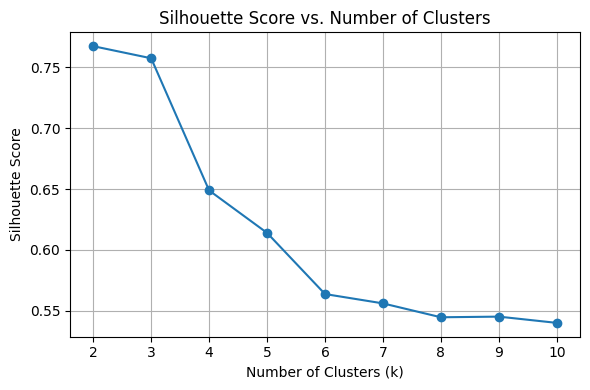

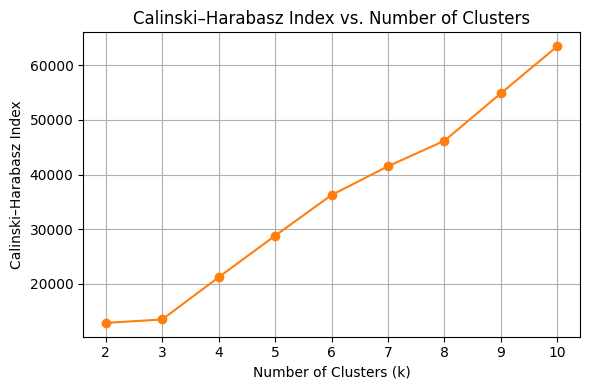

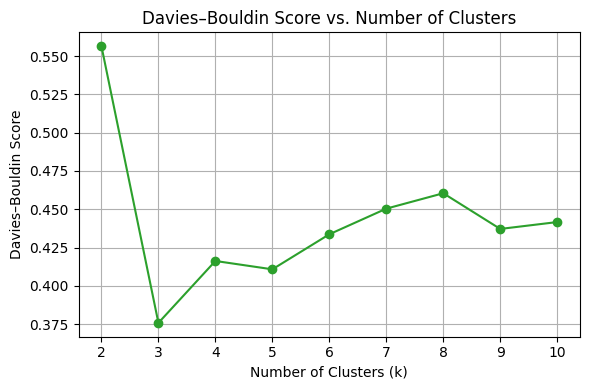

In [34]:

# 2. Plot Silhouette Score
plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o', color='C0')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot Calinski–Harabasz Index
plt.figure(figsize=(6,4))
plt.plot(k_values, ch_scores, marker='o', color='C1')
plt.title('Calinski–Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski–Harabasz Index')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Plot Davies–Bouldin Score
plt.figure(figsize=(6,4))
plt.plot(k_values, db_scores, marker='o', color='C2')
plt.title('Davies–Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies–Bouldin Score')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

K-Means metrics for k=3:
  Silhouette Score:       0.758 (higher is better)
  Calinski–Harabasz:      13474.2 (higher is better)
  Davies–Bouldin Score:   0.376 (lower is better)


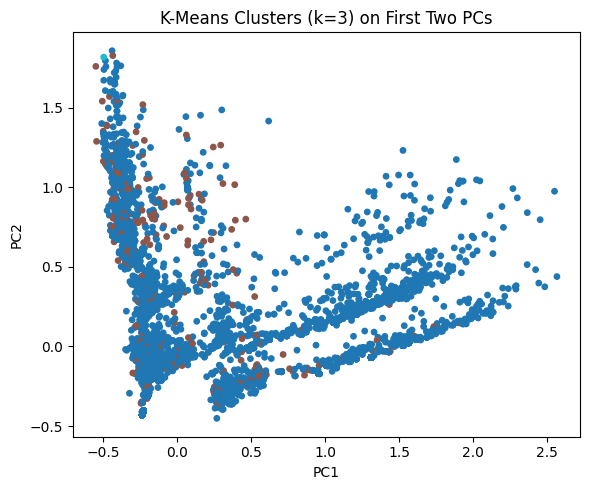

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume df_result contains all scaled features (Length, Mass, pI, PCs)
X_all = df_result.values

# 1. Fit K-Means with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_all)

# 2. Attach cluster labels to your DataFrame
df_result = df_result.copy()
df_result['cluster'] = labels

# 3. Print clustering metrics for k=3
sil = silhouette_score(X_all, labels)
ch = calinski_harabasz_score(X_all, labels)
db = davies_bouldin_score(X_all, labels)
print(f"K-Means metrics for k=3:")
print(f"  Silhouette Score:       {sil:.3f} (higher is better)")
print(f"  Calinski–Harabasz:      {ch:.1f} (higher is better)")
print(f"  Davies–Bouldin Score:   {db:.3f} (lower is better)")

# 4. Visualize clusters on first two PCs (or any two features)
plt.figure(figsize=(6, 5))
plt.scatter(df_result['PC1'], df_result['PC2'], c=labels, cmap='tab10', s=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters (k=3) on First Two PCs')
plt.tight_layout()
plt.show()

# Your df_result now has the assigned clusters for k=3


DBSCAN found 3 clusters.
Noise points assigned to cluster -1: 14863
Silhouette Score:       1.000 (higher is better)
Calinski–Harabasz:      112555948218679116796897571704090872774656.0 (higher is better)
Davies–Bouldin Score:   0.000 (lower is better)


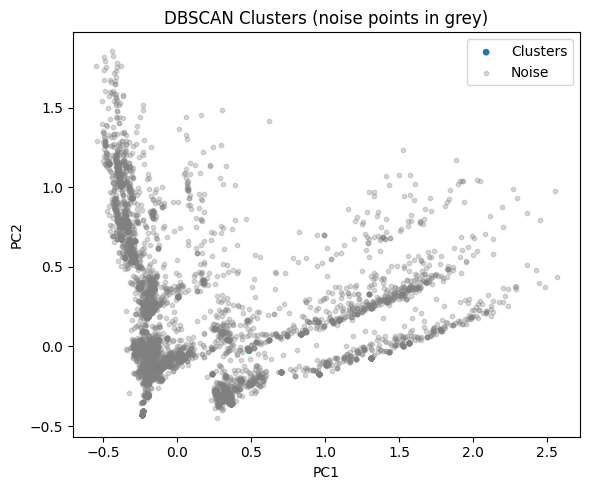

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume df_result contains all scaled features (Length, Mass, pI, PCs)
X_all = df_result.values

# 1. Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to tune eps and min_samples for your data!
labels = dbscan.fit_predict(X_all)

# 2. Attach cluster labels to your DataFrame
df_result = df_result.copy()
df_result['cluster'] = labels

# 3. Count clusters (excluding noise label, usually -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"DBSCAN found {n_clusters} clusters.")
print(f"Noise points assigned to cluster -1: {n_noise}")

# 4. Compute clustering metrics (only for valid clusters)
if n_clusters >= 2:
    sil = silhouette_score(X_all[labels != -1], labels[labels != -1])
    ch = calinski_harabasz_score(X_all[labels != -1], labels[labels != -1])
    db = davies_bouldin_score(X_all[labels != -1], labels[labels != -1])
    print(f"Silhouette Score:       {sil:.3f} (higher is better)")
    print(f"Calinski–Harabasz:      {ch:.1f} (higher is better)")
    print(f"Davies–Bouldin Score:   {db:.3f} (lower is better)")
else:
    print("Not enough clusters (besides noise) to compute metrics.")

# 5. Visualize clusters (excluding noise) on first two PCs
plt.figure(figsize=(6, 5))
valid = labels != -1
plt.scatter(df_result['PC1'][valid], df_result['PC2'][valid], c=labels[valid], cmap='tab10', s=15, label='Clusters')
plt.scatter(df_result['PC1'][~valid], df_result['PC2'][~valid], color='grey', alpha=0.3, s=10, label='Noise')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters (noise points in grey)')
plt.legend()
plt.tight_layout()
plt.show()


DBSCAN found 3 clusters, noise points (label -1): 14863
Clustering metrics (without noise):
  Silhouette Score:       1.000
  Calinski–Harabasz:      112555949042300586716594545351410967379968.0
  Davies–Bouldin Score:   0.000


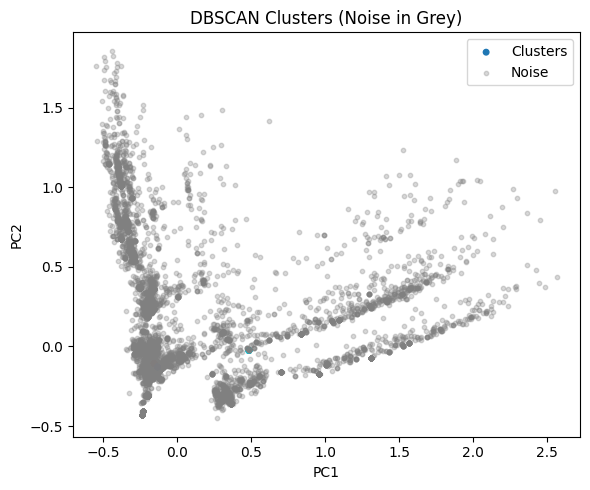

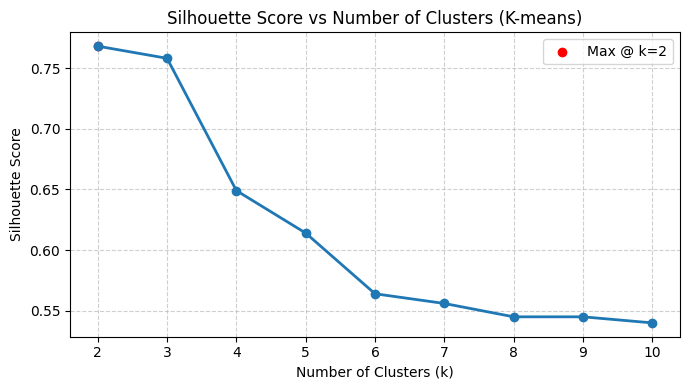

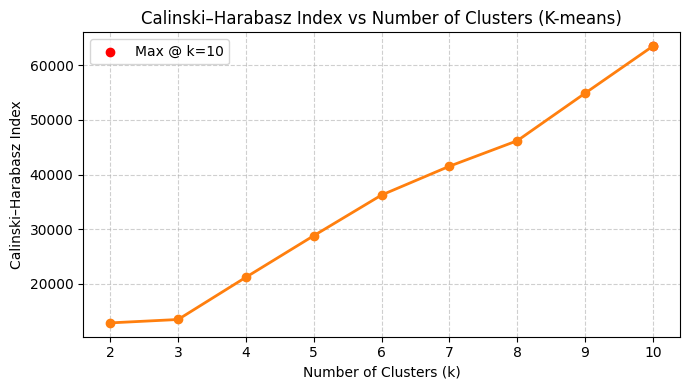

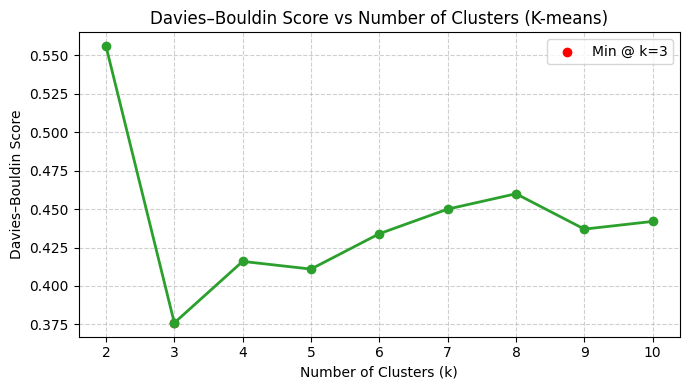

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assume df_result contains all scaled features (Length, Mass, pI, PCs)
X_all = df_result.values

# 1. Fit DBSCAN and get labels
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune as needed!
labels = dbscan.fit_predict(X_all)

df_result = df_result.copy()
df_result['cluster'] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"DBSCAN found {n_clusters} clusters, noise points (label -1): {n_noise}")

# 2. Compute metrics only if at least 2 clusters (excluding noise)
if n_clusters >= 2:
    valid_mask = labels != -1
    sil = silhouette_score(X_all[valid_mask], labels[valid_mask])
    ch  = calinski_harabasz_score(X_all[valid_mask], labels[valid_mask])
    db  = davies_bouldin_score(X_all[valid_mask], labels[valid_mask])
    print("Clustering metrics (without noise):")
    print(f"  Silhouette Score:       {sil:.3f}")
    print(f"  Calinski–Harabasz:      {ch:.1f}")
    print(f"  Davies–Bouldin Score:   {db:.3f}")
else:
    sil = ch = db = None
    print("Not enough clusters (besides noise) to compute metrics.")

# 3. Scatter plot for cluster assignments (PC1 vs PC2)
plt.figure(figsize=(6, 5))
valid = labels != -1
plt.scatter(df_result['PC1'][valid], df_result['PC2'][valid], c=labels[valid], cmap='tab10', s=16, label='Clusters')
plt.scatter(df_result['PC1'][~valid], df_result['PC2'][~valid], color='grey', alpha=0.3, s=10, label='Noise')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters (Noise in Grey)')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Clustering metric visualizations (cross-comparison, not for DBSCAN grid, but for K-Means results above!)
k_values      = range(2, 11)
sil_scores    = [0.768, 0.758, 0.649, 0.614, 0.564, 0.556, 0.545, 0.545, 0.540]  # Fill in your silhouette scores for K-means
ch_scores     = [12852.8, 13474.2, 21207.3, 28814.7, 36258.2, 41529.0, 46196.4, 54891.0, 63509.5]  # Fill in your Calinski–Harabasz scores for K-means
db_scores     = [0.556, 0.376, 0.416, 0.411, 0.434, 0.450, 0.460, 0.437, 0.442]  # Fill in your Davies–Bouldin scores for K-means

plt.figure(figsize=(7, 4))
plt.plot(k_values, sil_scores, marker='o', color='#1f77b4', linewidth=2)
plt.title('Silhouette Score vs Number of Clusters (K-means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
max_idx = sil_scores.index(max(sil_scores))
plt.scatter(k_values[max_idx], sil_scores[max_idx], color='red', label=f'Max @ k={k_values[max_idx]}')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(k_values, ch_scores, marker='o', color='#ff7f0e', linewidth=2)
plt.title('Calinski–Harabasz Index vs Number of Clusters (K-means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski–Harabasz Index')
plt.grid(True, linestyle='--', alpha=0.6)
max_idx = ch_scores.index(max(ch_scores))
plt.scatter(k_values[max_idx], ch_scores[max_idx], color='red', label=f'Max @ k={k_values[max_idx]}')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(k_values, db_scores, marker='o', color='#2ca02c', linewidth=2)
plt.title('Davies–Bouldin Score vs Number of Clusters (K-means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies–Bouldin Score')
plt.grid(True, linestyle='--', alpha=0.6)
min_idx = db_scores.index(min(db_scores))
plt.scatter(k_values[min_idx], db_scores[min_idx], color='red', label=f'Min @ k={k_values[min_idx]}')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# df_result has your cluster labels
summary = df_result.groupby('cluster')[['Length', 'Mass', 'pI']].describe().T
print(summary)


cluster                 -1           0           1          2
Length count  1.486300e+04      5.0000      5.0000      5.000
       mean   6.011163e+02    198.0000    265.0000    424.000
       std    6.219293e+02      0.0000      0.0000      0.000
       min    1.100000e+01    198.0000    265.0000    424.000
       25%    2.960000e+02    198.0000    265.0000    424.000
       50%    4.530000e+02    198.0000    265.0000    424.000
       75%    7.175000e+02    198.0000    265.0000    424.000
       max    3.435000e+04    198.0000    265.0000    424.000
Mass   count  1.486300e+04      5.0000      5.0000      5.000
       mean   6.698195e+04  21644.0000  31441.0000  44926.000
       std    6.911462e+04      0.0000      0.0000      0.000
       min    1.142000e+03  21644.0000  31441.0000  44926.000
       25%    3.312250e+04  21644.0000  31441.0000  44926.000
       50%    5.043600e+04  21644.0000  31441.0000  44926.000
       75%    8.029500e+04  21644.0000  31441.0000  44926.000
       m

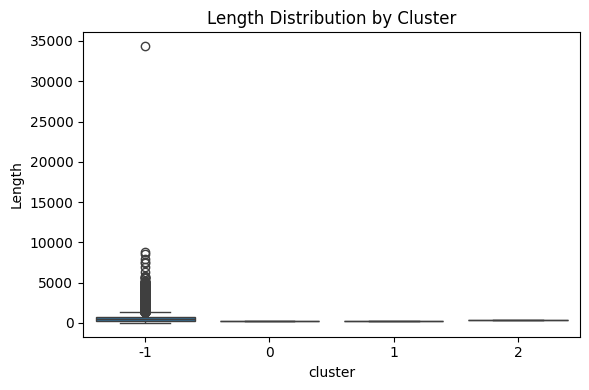

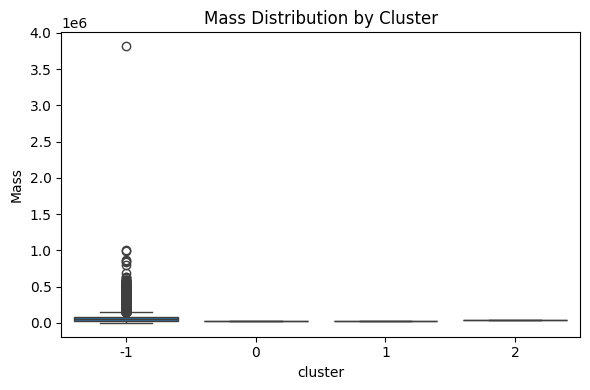

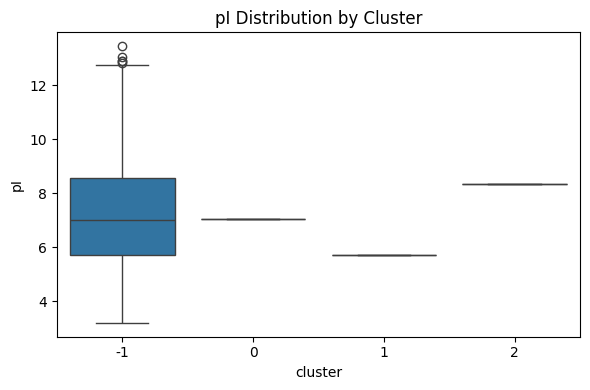

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Length', 'Mass', 'pI']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=df_result)
    plt.title(f'{col} Distribution by Cluster')
    plt.tight_layout()
    plt.show()
